In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

guest_ids = [f"G{str(i).zfill(3)}" for i in range(1, 51)]
emotions = ["Happy", "Neutral", "Bored", "Excited", "Sad"]
activities = ["Welcome Speech", "Snacks Served", "Live Band", "Dance Floor Open", "Speech", "Game Activity"]
time_slots = pd.date_range("18:00", "23:00", freq="15min").strftime("%H:%M")


In [13]:
mock_data = []
for time in time_slots:
    sampled_guests=np.random.choice(guest_ids, size=np.random.randint(40, 45), replace=False)
    
    for guest in sampled_guests:
        time = np.random.choice(time_slots)
        emotion = np.random.choice(emotions, p=[0.3, 0.25, 0.2, 0.2, 0.05])
        activity = np.random.choice(activities)
        mock_data.append([guest, time, emotion, activity])


In [14]:
df_mock = pd.DataFrame(mock_data, columns=["Guest_ID", "Timestamp", "Emotion", "Activity"])

csv_path = "C:/Users/Administrator/Downloads/emotion_event_data.csv"
df_mock.to_csv(csv_path, index=False)

In [12]:
df_mock

,Guest_ID,Timestamp,Emotion,Activity
0,G039,22:45,Sad,Live Band
1,G008,23:00,Happy,Live Band
2,G023,20:30,Neutral,Speech
3,G036,19:45,Bored,Game Activity
4,G002,20:45,Excited,Snacks Served
...,...,...,...,...
295,G035,22:45,Sad,Dance Floor Open
296,G024,22:00,Excited,Live Band
297,G046,22:00,Neutral,Welcome Speech
298,G014,20:00,Neutral,Speech


('C:/Users/Administrator/Downloads/emotion_event_data.csv',
 'C:/Users/Administrator/Downloads/emotion_trend_plot.png')

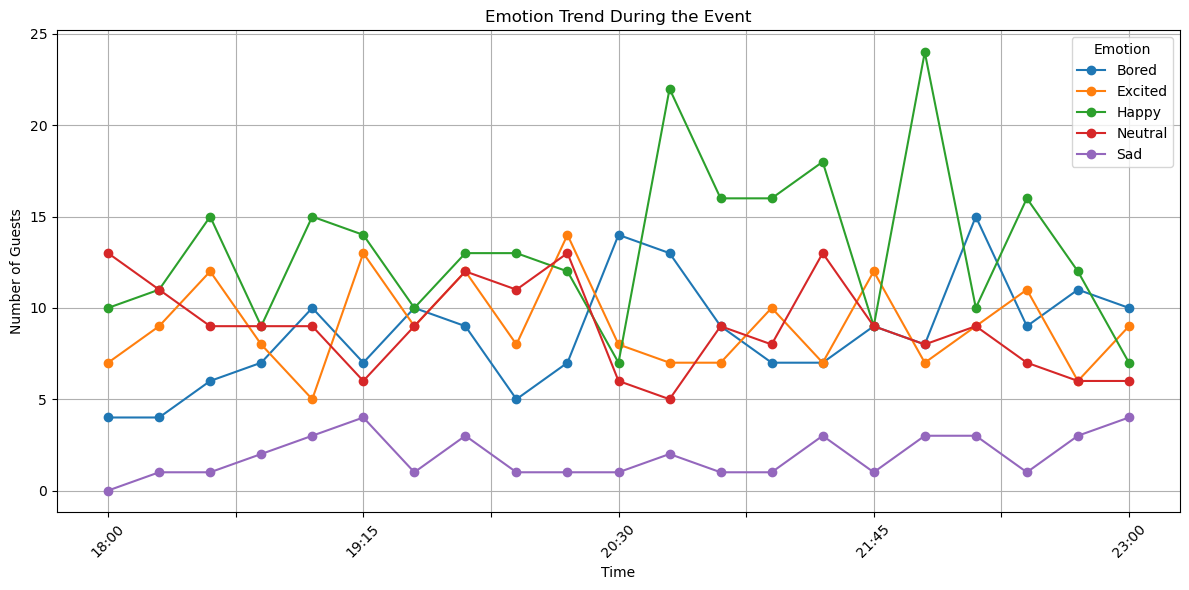

In [15]:
emotion_time = df_mock.groupby(["Timestamp", "Emotion"]).size().unstack(fill_value=0)
emotion_time_plot = emotion_time.plot(figsize=(12, 6), marker='o')
plt.title("Emotion Trend During the Event")
plt.xlabel("Time")
plt.ylabel("Number of Guests")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plot_path = "C:/Users/Administrator/Downloads/emotion_trend_plot.png"
plt.savefig(plot_path)

csv_path, plot_path

In [11]:
df_mock['Guest_ID'].unique()

array(['G039', 'G008', 'G023', 'G036', 'G002', 'G021', 'G044', 'G028',
       'G047', 'G003', 'G009', 'G014', 'G007', 'G029', 'G010', 'G018',
       'G025', 'G001', 'G017', 'G005', 'G034', 'G024', 'G027', 'G026',
       'G015', 'G013', 'G032', 'G006', 'G011', 'G037', 'G049', 'G019',
       'G020', 'G041', 'G040', 'G042', 'G048', 'G033', 'G038', 'G046',
       'G016', 'G022', 'G045', 'G035', 'G030', 'G012', 'G004', 'G043',
       'G050', 'G031'], dtype=object)